# Step 1: import Libraries

In [ ]:
# !pip install tensorflow numpy metplotlib
# !pip install tflite-support
# !pip install protobuf==3.20.3

!pip uninstall -y tensorflow tensorflow-cpu tensorflow-gpu tflite-support protobuf absl-py
!apt-get update
!apt-get install -y libusb-1.0-0


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease 
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2007 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3311 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3641 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1274 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [5449 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [71.0 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd6

In [7]:
# !pip uninstall -y tensorflow tflite-support protobuf
!pip install tensorflow numpy matplotlib
!pip install seaborn
!pip install scikit-learn
# !pip install google-colab
!apt update && apt install -y libusb-1.0-0

  Using cached tensorflow-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached protobuf-6.32.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
Using cached tensorflow-2.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.6 MB)
Using cached absl_py-2.3.1-py3-none-any.whl (135 kB)
Using cached protobuf-6.32.1-cp39-abi3-manylinux2014_x86_64.whl (322 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease

In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomBrightness, RandomContrast

import warnings
import random
import os
warnings.filterwarnings("ignore")

In [132]:
# Ścieżka do folderu z danymi
#stare
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
dataset_path = "dataset"

# Parametry
batch_size = 16
img_height = 224
img_width = 224
validation_split = 0.3
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Dodane!

# Tworzenie zbiorów treningowego i walidacyjnego
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names

def count_samples_after_split(dataset, dataset_name):
    """Sprawdź ile próbek każdej klasy zostało po podziale"""
    class_counts = {i: 0 for i in range(len(class_names))}
    
    for _, labels in dataset:
        for label in labels:
            class_counts[label.numpy()] += 1
    
    print(f"\n{dataset_name}:")
    total = sum(class_counts.values())
    for i, count in class_counts.items():
        percentage = (count / total) * 100
        print(f"  {class_names[i]}: {count} samples ({percentage:.1f}%)")
    
    return class_counts

# Sprawdź rozkład przed augmentacją
train_counts = count_samples_after_split(train_ds, "Training set")
val_counts = count_samples_after_split(val_ds, "Validation set")

#augmentacja

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", seed=seed),     
    RandomRotation(0.2, seed=seed+1),                    
    RandomZoom(0.15, seed=seed+2),
    RandomTranslation(0.15, 0.15, seed=seed+3),
    RandomBrightness(0.1, seed=seed+4),
    RandomContrast(0.1, seed=seed+5),
])

data_augmentation_2 = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", seed=seed+10),
    RandomRotation(0.2, seed=seed+11),             
    RandomZoom(0.2, seed=seed+12),                      
    RandomTranslation(0.2, 0.2, seed=seed+13),       
    RandomBrightness(0.1, seed=seed+14),                
])

data_augmentation_3 = tf.keras.Sequential([
    RandomFlip("vertical", seed=seed+20),
    RandomRotation(0.15, seed=seed+21),
    RandomZoom((-0.1, 0.15), seed=seed+22),            
    RandomContrast(0.1, seed=seed+23),                  
])

data_augmentation_4 = tf.keras.Sequential([
    RandomFlip("horizontal", seed=seed+30),
    RandomRotation(0.3, seed=seed+31),
    RandomZoom(0.2, seed=seed+32),
    RandomTranslation(0.25, 0.25, seed=seed+33),
    RandomBrightness(0.2, seed=seed+34),
    RandomContrast(0.2, seed=seed+35),
])

data_augmentation_5 = tf.keras.Sequential([
    RandomRotation(0.5),
    RandomZoom(0.3),
    RandomTranslation(0.4, 0.4),
    RandomBrightness(0.25),
])

data_augmentation_6 = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation((-0.3, 0.3)),
    RandomContrast(0.25),
    tf.keras.layers.GaussianNoise(0.05)
])


# normalization_layer = tf.keras.layers.Rescaling(1./255)
# normalization_layer = tf.keras.layers.Lambda(preprocess_input)

original_train_ds = train_ds.map(lambda x, y: (x, y))
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
augmented_train_ds2 = train_ds.map(lambda x, y: (data_augmentation_2(x, training=True), y))
augmented_train_ds3 = train_ds.map(lambda x, y: (data_augmentation_3(x, training=True), y))
augmented_train_ds4 = train_ds.map(lambda x, y: (data_augmentation_4(x, training=True), y))
augmented_train_ds5 = train_ds.map(lambda x, y: (data_augmentation_5(x, training=True), y))
augmented_train_ds6 = train_ds.map(lambda x, y: (data_augmentation_6(x, training=True), y))
train_ds = original_train_ds.concatenate(augmented_train_ds).concatenate(augmented_train_ds2).concatenate(augmented_train_ds3).concatenate(augmented_train_ds4).concatenate(augmented_train_ds5).concatenate(augmented_train_ds6)
train_ds = train_ds.prefetch(1)

val_ds = val_ds.map(lambda x, y: (x, y))


count_samples_after_split(train_ds, "Training tu")
count_samples_after_split(val_ds, "Validation tu")

Found 156 files belonging to 3 classes.
Using 110 files for training.


Found 156 files belonging to 3 classes.
Using 46 files for validation.

Training set:
  homogenizowany: 46 samples (41.8%)
  skyr: 32 samples (29.1%)
  wiejski: 32 samples (29.1%)

Validation set:
  homogenizowany: 15 samples (32.6%)
  skyr: 21 samples (45.7%)
  wiejski: 10 samples (21.7%)

Training tu:
  homogenizowany: 322 samples (41.8%)
  skyr: 224 samples (29.1%)
  wiejski: 224 samples (29.1%)

Validation tu:
  homogenizowany: 15 samples (32.6%)
  skyr: 21 samples (45.7%)
  wiejski: 10 samples (21.7%)


{0: 15, 1: 21, 2: 10}

In [228]:
#stworzxenie nowego setu
#nowe

# def create_perfectly_balanced_dataset():
#     """Stwórz perfekcyjnie zbalansowany dataset"""
    
#     # Znajdź klasę z najmniejszą liczbą próbek
#     class_counts = {}
#     for class_name in class_names:
#         class_path = os.path.join(dataset_path, class_name)
#         files = [f for f in os.listdir(class_path) 
#                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
#         class_counts[class_name] = len(files)
    
#     min_count = min(class_counts.values())
#     print(f"Smallest class has {min_count} images")
#     print("Creating perfectly balanced dataset with {min_count} samples per class")
    
#     # Stwórz datasety z równą liczbą próbek
#     balanced_datasets = []
    
#     for i, class_name in enumerate(class_names):
#         print(f"Processing {class_name}...")
        
#         # Załaduj wszystkie obrazy tej klasy
#         class_path = os.path.join(dataset_path, class_name)
#         files = [f for f in os.listdir(class_path) 
#                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
#         # Wybierz losowo min_count obrazów
#         selected_files = np.random.choice(files, min_count, replace=False)
        
#         images = []
#         labels = []
        
#         for img_file in selected_files:
#             img_path = os.path.join(class_path, img_file)
#             img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
#             img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
#             images.append(img_array)
#             labels.append(i)
        
#         # Stwórz dataset dla tej klasy
#         class_ds = tf.data.Dataset.from_tensor_slices((
#             np.array(images, dtype=np.float32),
#             np.array(labels, dtype=np.int32)
#         ))
        
#         balanced_datasets.append(class_ds)
#         print(f"  Added {len(images)} samples")
    
#     # Połącz wszystkie klasy
#     final_ds = balanced_datasets[0]
#     for ds in balanced_datasets[1:]:
#         final_ds = final_ds.concatenate(ds)
    
#     # Split na train/val (80/20) zachowując balance
#     total_samples = min_count * len(class_names)
#     train_size = int(total_samples * 0.8)
    
#     final_ds = final_ds.shuffle(10000, seed=42)
#     train_ds_perfect = final_ds.take(train_size).batch(batch_size)
#     val_ds_perfect = final_ds.skip(train_size).batch(batch_size)
    
#     return train_ds_perfect, val_ds_perfect

# # Stwórz perfekcyjnie zbalansowany dataset
# print("Creating perfectly balanced dataset...")
# train_ds, val_ds = create_perfectly_balanced_dataset()

# # Sprawdź rozkład
# count_samples_after_split(train_ds, "Perfect Training")
# count_samples_after_split(val_ds, "Perfect Validation")

# #augmentacja

# data_augmentation = tf.keras.Sequential([
#     RandomFlip("horizontal_and_vertical", seed=seed),     
#     RandomRotation(0.2, seed=seed+1),                    
#     RandomZoom(0.15, seed=seed+2),
#     RandomTranslation(0.15, 0.15, seed=seed+3),
#     RandomBrightness(0.1, seed=seed+4),
#     RandomContrast(0.1, seed=seed+5),
# ])

# data_augmentation_2 = tf.keras.Sequential([
#     RandomFlip("horizontal_and_vertical", seed=seed+10),
#     RandomRotation(0.2, seed=seed+11),             
#     RandomZoom(0.2, seed=seed+12),                      
#     RandomTranslation(0.2, 0.2, seed=seed+13),       
#     RandomBrightness(0.1, seed=seed+14),                
# ])

# data_augmentation_3 = tf.keras.Sequential([
#     RandomFlip("vertical", seed=seed+20),
#     RandomRotation(0.15, seed=seed+21),
#     RandomZoom((-0.1, 0.15), seed=seed+22),            
#     RandomContrast(0.1, seed=seed+23),                  
# ])

# data_augmentation_4 = tf.keras.Sequential([
#     RandomFlip("horizontal", seed=seed+30),
#     RandomRotation(0.3, seed=seed+31),
#     RandomZoom(0.2, seed=seed+32),
#     RandomTranslation(0.25, 0.25, seed=seed+33),
#     RandomBrightness(0.2, seed=seed+34),
#     RandomContrast(0.2, seed=seed+35),
# ])

# data_augmentation_5 = tf.keras.Sequential([
#     RandomRotation(0.5),
#     RandomZoom(0.3),
#     RandomTranslation(0.4, 0.4),
#     RandomBrightness(0.25),
# ])

# data_augmentation_6 = tf.keras.Sequential([
#     RandomFlip("horizontal"),
#     RandomRotation((-0.3, 0.3)),
#     RandomContrast(0.25),
#     tf.keras.layers.GaussianNoise(0.05)
# ])

# class_names = ['homogenizowany', 'skyr', 'wiejski']

# normalization_layer = tf.keras.layers.Rescaling(1./255)

# original_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# augmented_train_ds = train_ds.map(lambda x, y: (normalization_layer(data_augmentation(x, training=True)), y))
# augmented_train_ds2 = train_ds.map(lambda x, y: (normalization_layer(data_augmentation_2(x, training=True)), y))
# augmented_train_ds3 = train_ds.map(lambda x, y: (normalization_layer(data_augmentation_3(x, training=True)), y))
# augmented_train_ds4 = train_ds.map(lambda x, y: (normalization_layer(data_augmentation_4(x, training=True)), y))
# augmented_train_ds5 = train_ds.map(lambda x, y: (normalization_layer(data_augmentation_5(x, training=True)), y))
# augmented_train_ds6 = train_ds.map(lambda x, y: (normalization_layer(data_augmentation_6(x, training=True)), y))
# train_ds = original_train_ds.concatenate(augmented_train_ds).concatenate(augmented_train_ds2).concatenate(augmented_train_ds3).concatenate(augmented_train_ds4).concatenate(augmented_train_ds5).concatenate(augmented_train_ds6)
# train_ds = train_ds.prefetch(1)

# val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# count_samples_after_split(train_ds, "Perfect Training tu")
# count_samples_after_split(val_ds, "Perfect Validation tu")

In [133]:
#dodanie wag

class_weight = {
    0: 1.0,  # homogenizowany
    1: 1.0,  # skyr  
    2: 1.0   # wiejski
}

print("Class weights:", class_weight)

Class weights: {0: 1.0, 1: 1.0, 2: 1.0}


In [134]:
# print("Klasy:", class_names)
total_count = 0
for images, labels in train_ds:
    total_count += images.shape[0]
    print(f"Batch size: {images.shape[0]}")

print(f"Rzeczywista liczba elementów: {total_count}")

for images, labels in train_ds.take(1):
    print("x trains shape ",images.shape)  # (batch_size, height, width, channels)
    print("y train shape", labels.numpy())  # np.array etykiet

for images, labels in val_ds.take(1):
    print("x val shape ",images.shape)
    print("y val shape", labels.numpy())
    
for idx, class_name in enumerate(class_names):
    print(f"Klasa {idx}: {class_name}")

Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 16
Batch size: 14
Rzeczywista liczba elementów: 770
x trains shape  (16, 224, 224, 3)
y train shape [1 2 1 1 1 0 1 0 1 0 2 2 0 2 1 0]
x val shape  (16, 224, 224, 3)
y val shape [1 0 2 2 1 1 1 1 1 2 2 1 0 1 0 1]
Klasa 0: homogenizowany
Klasa 1: skyr
Klasa 2: wiejski


In [106]:
# Pobierz nazwy klas (np. ['homogenizowany', 'skyr', 'wiejski'])
# class_names = train_ds.class_names

# Pobierz jeden batch (np. 32 obrazki)
# for images, labels in train_ds.take(1):
#     plt.figure(figsize=(10, 10))
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow((images[i].numpy() * 255).astype("uint8"))
#         plt.title(class_names[labels[i]] + "xd")
#         plt.axis("off")
#     plt.show()

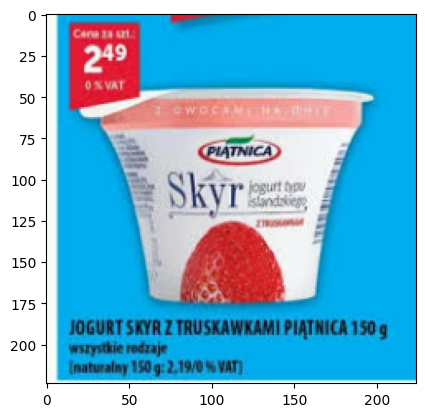

In [136]:
for i, l in train_ds.take(1):
    plt.imshow((i[0].numpy() ).astype("uint8"))
    # plt.imshow((i[0].numpy() * 255).astype("uint8"))

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50

num_classes = len(class_names)
tf.random.set_seed(seed)

# base_model = tf.keras.applications.EfficientNetB0(
#     weights='imagenet',
#     include_top=False,
#     input_shape=(200, 200, 3)
# )
# base_model.trainable = False 

# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dropout(0.2),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(3, activation='softmax')
# ])

# model = Sequential()

# model.add(
#     Conv2D(
#         32, (5,5), 
#         activation='relu', 
#         input_shape=(200,200,3)
#     )
# )
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size= (2, 2)))

# model.add(Conv2D(32, (5,5), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size= (2, 2)))

# model.add(Flatten())

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(3, activation='softmax'))
# model.add(Dropout(0.5))

#last model v17
# model = Sequential([
#     Conv2D(32, 3, activation='relu', input_shape=(200, 200, 3)),
#     MaxPooling2D(),
    
#     Conv2D(64, 3, activation='relu'),
#     MaxPooling2D(),
    
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
    
#     Dense(3, activation='softmax')
# ])

base_model = ResNet50(input_shape=(224,224,3),
                         include_top=False, 
                         weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')
])

In [152]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 5 (GlobalAveragePooling2D)                                      
                                                                 
 dense_42 (Dense)            (None, 256)               524544    
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                     

In [154]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

epochs=10
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1,min_lr=1e-6)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True,
  class_weight=class_weight,
  callbacks=[early_stop, reduce_lr]
)

Epoch 1/10
49/49 [==============================] - 28s 530ms/step - loss: 1.2609 - accuracy: 0.4468 - val_loss: 0.6655 - val_accuracy: 0.8043 - lr: 1.0000e-04
Epoch 2/10
49/49 [==============================] - 26s 519ms/step - loss: 0.7106 - accuracy: 0.6948 - val_loss: 0.4261 - val_accuracy: 0.8913 - lr: 1.0000e-04
Epoch 3/10
49/49 [==============================] - 26s 524ms/step - loss: 0.5325 - accuracy: 0.7896 - val_loss: 0.3120 - val_accuracy: 0.9130 - lr: 1.0000e-04
Epoch 4/10
49/49 [==============================] - 26s 522ms/step - loss: 0.3673 - accuracy: 0.8623 - val_loss: 0.2274 - val_accuracy: 0.9565 - lr: 1.0000e-04
Epoch 5/10
49/49 [==============================] - 26s 525ms/step - loss: 0.3010 - accuracy: 0.8883 - val_loss: 0.1930 - val_accuracy: 0.9565 - lr: 1.0000e-04
Epoch 6/10
49/49 [==============================] - 26s 526ms/step - loss: 0.2462 - accuracy: 0.9195 - val_loss: 0.1665 - val_accuracy: 0.9783 - lr: 1.0000e-04
Epoch 7/10
49/49 [======================

In [155]:
def check_model_bias():
    """Sprawdź czy model ma skłonność do konkretnej klasy"""
    
    # Test na czystym szumie - powinien być równomierny
    noise_images = np.random.random((100, 224, 224, 3))
    noise_predictions = model.predict(noise_images)
    
    noise_class_counts = np.bincount(np.argmax(noise_predictions, axis=1))
    
    print("Predykcje modelu na czystym szumie:")
    for i, count in enumerate(noise_class_counts):
        if i < len(class_names):
            print(f"{class_names[i]}: {count}/100 ({count / len(noise_images) * 100:.1f}%)")
    
    # Jeśli jedna klasa dominuje nawet na szumie = bias!
    if max(noise_class_counts) > 60:
        print("⚠️ Model ma silny bias w stronę jednej klasy!")
        return True
    return False

has_bias = check_model_bias()

4/4 [==============================] - 3s 506ms/step
Predykcje modelu na czystym szumie:
homogenizowany: 0/100 (0.0%)
skyr: 100/100 (100.0%)
⚠️ Model ma silny bias w stronę jednej klasy!


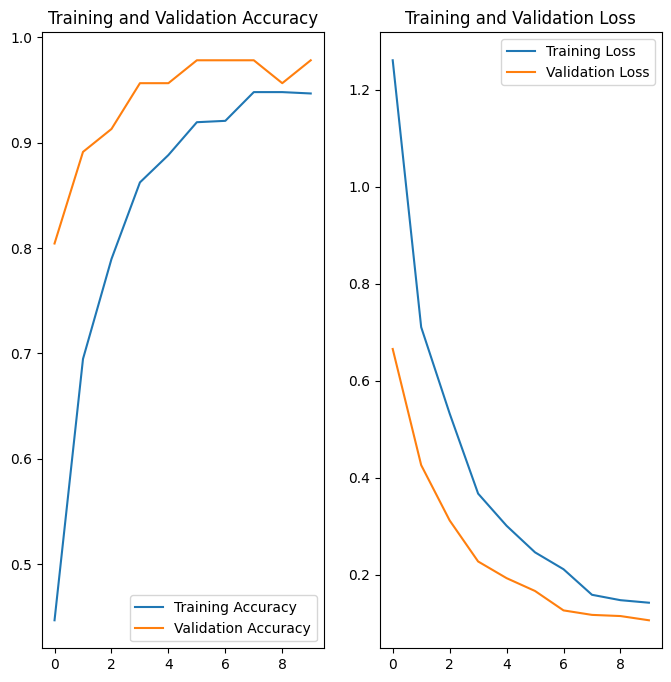

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
1/1 [==============================] - 0s 306ms/step


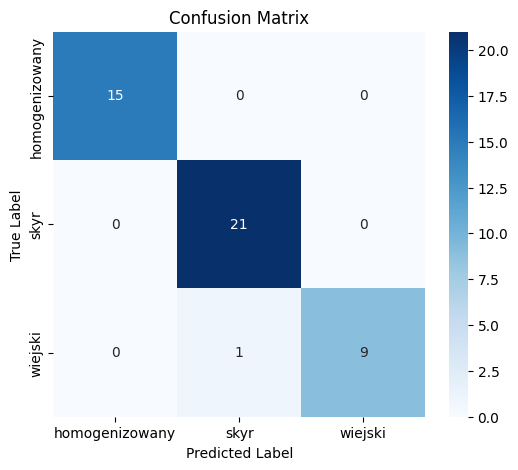

                precision    recall  f1-score   support

homogenizowany       1.00      1.00      1.00        15
          skyr       0.95      1.00      0.98        21
       wiejski       1.00      0.90      0.95        10

      accuracy                           0.98        46
     macro avg       0.98      0.97      0.97        46
  weighted avg       0.98      0.98      0.98        46



In [158]:
%pip install seaborn
%pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


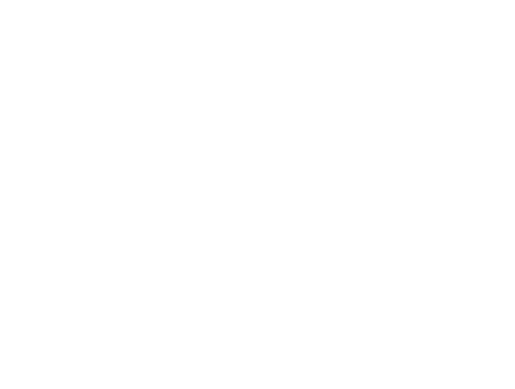

1/1 [==============================] - 0s 46ms/step
homogenizowany: 0.0478
skyr: 0.6879
wiejski: 0.2642


In [159]:
#test
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

img_data = requests.get("https://piatnica.com.pl/content/uploads/2023/05/11850_ciasteczka_wizualizacja.png").content
with open('test_image.jpg', 'wb') as handler:
    handler.write(img_data)

test_image = plt.imread('test_image.jpg')
test_image.resize((224,224, 3))
img_array = np.array(test_image).astype("float32")


plt.axis("off")
plt.show()


# predictions = model.predict(np.array([test_image]))
# predictions = predictions[0]
predictions = model.predict(np.expand_dims(img_array, axis=0))[0]

for class_name, prob in zip(class_names, predictions):
    print(f"{class_name}: {prob:.4f}")

# for i, l in train_ds.take(1):
#     plt.imshow((i[0].numpy() * 255).astype("uint8"))

export

In [160]:
model.save("model2.keras")
# Wczytaj model (jeśli wcześniej zapisałeś jako .h5)
model = tf.keras.models.load_model("model2.keras")

# Konwertuj do TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Zapisz do pliku
with open("model12.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp1kjztbbf/assets


INFO:tensorflow:Assets written to: /tmp/tmp1kjztbbf/assets
2025-09-18 11:13:18.883995: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2025-09-18 11:13:18.884033: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2025-09-18 11:13:18.884239: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp1kjztbbf
2025-09-18 11:13:18.896542: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-09-18 11:13:18.896561: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp1kjztbbf
2025-09-18 11:13:18.938182: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2025-09-18 11:13:19.276810: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp1kjztbbf
2025-09-18 11:13:19.389310: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

In [161]:
%pip install tflite-support

from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

# Ścieżki do plików
model_path = "model12.tflite"               # model bez metadanych
label_path = "labels.txt"                 # etykiety (np. homogenizowany, skyr, wiejski)
save_path = "model_with_metadata_mobile_net_v7.tflite"  # model wynikowy

# Wartości normalizacji – dla modeli trenowanych na obrazkach w zakresie [0, 1]
mean = [0.0]
std = [1.0]  # Jeśli dzieliłeś piksele przez 255, zostaw std=[1.0]

writer = image_classifier.MetadataWriter.create_for_inference(
    writer_utils.load_file(model_path),
    input_norm_mean=mean,
    input_norm_std=std,
    label_file_paths=[label_path]
)
# Zapisz nowy model z metadanymi
writer_utils.save_file(writer.populate(), save_path)


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
